## Cognitive Science 1 Final Project

Topics regarding visual illusions are always a moot point of many studies and discussions. In our daily lives, we constantly have seen the illusions that can supposedly imply our emotions, level of stress, etc. In this study, we explored the correlation between **illusion magnitude**, the intensity level at which they perceive optical illusions, and **hemispheric dominance**, the side of a person's brain that's more active. We also hoped to see if age and gender play any role in illusion magnitude. To carry out the research, our team designed a survey and reached out to over 310 participants online.

The analysis portion of this project is done using a Jupyter notebook, which I have written (as I'm the only CS major). Unfortunately, to abide the research guidelines of the course, we cannot publish the survey data online.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

plt.style.use('seaborn');

In [4]:
raw = pd.read_csv('preliminary.csv')
raw.head(2)

,编号,开始答题时间,结束答题时间,答题时长,地理位置国家和地区,地理位置省,地理位置市,自定义字段,1.Please select your gender 请选择您的性别,2.Feel free to specify your gender in casenot listed above 如果您自认为为其他性别，您可以选择在这里填写,3.Please select your age interval 请选择您的年龄区间,4.Upon quick observation， in which of the choices below arethe horizontal bar and vertical bar equal in length? 简单观察后，以下哪一个选项中横竖线长度相等？,5.Upon quick observation， in which of the choices below are the orange circles equal in size? 简单观察后，以下哪一个选项中左右两个橙色圆形大小相等？,6.Upon quick observation， in which of the choices below are the left and right segments of the line equal in length? 简单观察后，以下哪一个选项中左右两条线长度相等？,7.When you put your palms together and your fingers are crossed， does your right thumb stay on the top or bottom? 当您将手掌放在一起并且手指交叉时，您的右手拇指会放在左手拇指的上面还是下面？,8.Which one do you remember more easily: The face or the name of someone you just met? 您更容易记住哪一个：您刚遇到的人的面孔或名字？,9.Which of the following subjects were/are you more interested in at school? 您对以下哪个科目更感兴趣？,10.How do you use facial expressions while communicating face to face? 当您面对面交流时会如何使用手势和面部表情？,11.We believe that more first choices to the fourquestionsabove correspond to the pattern of right hemisphere brain dominance. Without changing your prioranswers while still considering those， which of the choice below do you think best describes your hemispheric dominance? Note that the right hemisphere dominates left body movements. Feel free to leave it as not sure if you feel lost. 我们认为，以上四个问题的第一选择对应于大脑右半球的优势。 在不更改先前答案的情况下，参考之前问题，您认为以下哪种选择最能说明您的大脑半球优势？如果您不确定，可以选择 “我不确定”。,12.Upon quick observation， in which of the choices below are block A and B of the same darkness/color? 简单观察后，以下哪一个选项中AB色块灰度（颜色）相同？,13.Upon quick observation， in which of the choices below is the color/darkness consistent across the barin the middle of the picture? 简单观察后，以下哪一个选项中横向色条颜色/灰度一致（通体颜色相同）？,14.Upon quick observation， in which of the choices below do the vertical bars A and B have the same color? 简单观察后，以下哪两个选项中AB竖条颜色一致？,Unnamed: 22
0,315,19-Oct-2020 07:38:59,19-Oct-2020 07:46:43,464,中国,辽宁省,NaN,NaN,B.Female 女性,NaN,F.43 - 48,F.6,C.3,E.5,A.On Top 在上面,A.I remember faces more easily 我更容易记住面孔,A.English/Social Sciences （英语）文学、社会科学,B.I make very few facial expressions and physi...,C.I am left-brain dominated我左脑更具优势,F.6,C.3,D.4,NaN
1,314,18-Oct-2020 18:23:44,18-Oct-2020 18:29:41,357,中国,山东省,济南市,NaN,A.Male男性,NaN,G.48 - 53,B.2,C.3,D.4,A.On Top 在上面,A.I remember faces more easily 我更容易记住面孔,A.English/Social Sciences （英语）文学、社会科学,A.I actively use body language with intense ge...,B.I am not sure 我不确定我的大脑半球优势,E.5,E.5,F.6,NaN


In [5]:
data = raw.iloc[:, range(11, 22)].dropna()
data.head(2)

,4.Upon quick observation， in which of the choices below arethe horizontal bar and vertical bar equal in length? 简单观察后，以下哪一个选项中横竖线长度相等？,5.Upon quick observation， in which of the choices below are the orange circles equal in size? 简单观察后，以下哪一个选项中左右两个橙色圆形大小相等？,6.Upon quick observation， in which of the choices below are the left and right segments of the line equal in length? 简单观察后，以下哪一个选项中左右两条线长度相等？,7.When you put your palms together and your fingers are crossed， does your right thumb stay on the top or bottom? 当您将手掌放在一起并且手指交叉时，您的右手拇指会放在左手拇指的上面还是下面？,8.Which one do you remember more easily: The face or the name of someone you just met? 您更容易记住哪一个：您刚遇到的人的面孔或名字？,9.Which of the following subjects were/are you more interested in at school? 您对以下哪个科目更感兴趣？,10.How do you use facial expressions while communicating face to face? 当您面对面交流时会如何使用手势和面部表情？,11.We believe that more first choices to the fourquestionsabove correspond to the pattern of right hemisphere brain dominance. Without changing your prioranswers while still considering those， which of the choice below do you think best describes your hemispheric dominance? Note that the right hemisphere dominates left body movements. Feel free to leave it as not sure if you feel lost. 我们认为，以上四个问题的第一选择对应于大脑右半球的优势。 在不更改先前答案的情况下，参考之前问题，您认为以下哪种选择最能说明您的大脑半球优势？如果您不确定，可以选择 “我不确定”。,12.Upon quick observation， in which of the choices below are block A and B of the same darkness/color? 简单观察后，以下哪一个选项中AB色块灰度（颜色）相同？,13.Upon quick observation， in which of the choices below is the color/darkness consistent across the barin the middle of the picture? 简单观察后，以下哪一个选项中横向色条颜色/灰度一致（通体颜色相同）？,14.Upon quick observation， in which of the choices below do the vertical bars A and B have the same color? 简单观察后，以下哪两个选项中AB竖条颜色一致？
0,F.6,C.3,E.5,A.On Top 在上面,A.I remember faces more easily 我更容易记住面孔,A.English/Social Sciences （英语）文学、社会科学,B.I make very few facial expressions and physi...,C.I am left-brain dominated我左脑更具优势,F.6,C.3,D.4
1,B.2,C.3,D.4,A.On Top 在上面,A.I remember faces more easily 我更容易记住面孔,A.English/Social Sciences （英语）文学、社会科学,A.I actively use body language with intense ge...,B.I am not sure 我不确定我的大脑半球优势,E.5,E.5,F.6


In [6]:
# Isolate answers for geometrical illusions
gm_data = data.iloc[:, 0:3].dropna()
gm_data

,4.Upon quick observation， in which of the choices below arethe horizontal bar and vertical bar equal in length? 简单观察后，以下哪一个选项中横竖线长度相等？,5.Upon quick observation， in which of the choices below are the orange circles equal in size? 简单观察后，以下哪一个选项中左右两个橙色圆形大小相等？,6.Upon quick observation， in which of the choices below are the left and right segments of the line equal in length? 简单观察后，以下哪一个选项中左右两条线长度相等？
0,F.6,C.3,E.5
1,B.2,C.3,D.4
2,C.3,C.3,C.3
3,A.1,C.3,D.4
4,E.5,D.4,E.5
...,...,...,...
310,B.2,F.6,F.6
311,B.2,C.3,D.4
312,D.4,F.6,E.5
313,B.2,F.6,C.3


In [7]:
gm_score = gm_data.applymap(lambda x: int(x.split('.')[1]))
gm_score.iloc[:, 0] = 5 - gm_score.iloc[:, 0]
gm_score.iloc[:, 1] -= 2
gm_score.iloc[:, 2] -= 2

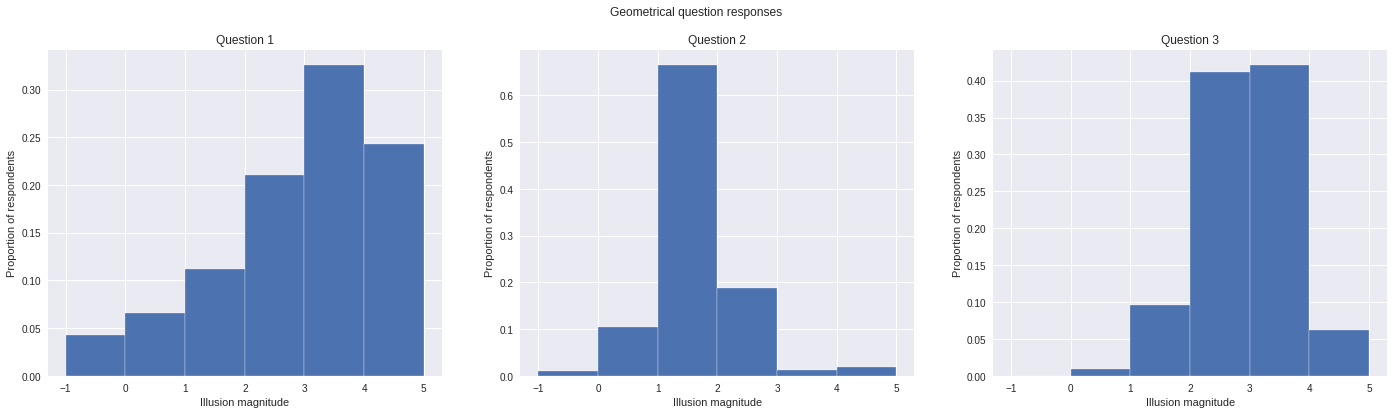

In [8]:
# View some distributions for these geometrical illusion responses

fig, axs = plt.subplots(1, 3, figsize=(24, 6))
fig.patch.set_facecolor('#ffffff')
fig.suptitle('Geometrical question responses')

axs[0].hist(gm_score.iloc[:, 0], bins=range(-1, 6), ec='w', density=True)
axs[0].set_xlabel('Illusion magnitude')
axs[0].set_ylabel('Proportion of respondents')
axs[0].set_title('Question 1');

axs[1].hist(gm_score.iloc[:, 1], bins=range(-1, 6), ec='w', density=True)
axs[1].set_xlabel('Illusion magnitude')
axs[1].set_ylabel('Proportion of respondents')
axs[1].set_title('Question 2');

axs[2].hist(gm_score.iloc[:, 2], bins=range(-1, 6), ec='w', density=True)
axs[2].set_xlabel('Illusion magnitude')
axs[2].set_ylabel('Proportion of respondents')
axs[2].set_title('Question 3');

In [9]:
# Isolate answers for non-geometrical illusions
ngm_data = data.iloc[:, 8:11].dropna()
ngm_data.head(5)

,12.Upon quick observation， in which of the choices below are block A and B of the same darkness/color? 简单观察后，以下哪一个选项中AB色块灰度（颜色）相同？,13.Upon quick observation， in which of the choices below is the color/darkness consistent across the barin the middle of the picture? 简单观察后，以下哪一个选项中横向色条颜色/灰度一致（通体颜色相同）？,14.Upon quick observation， in which of the choices below do the vertical bars A and B have the same color? 简单观察后，以下哪两个选项中AB竖条颜色一致？
0,F.6,C.3,D.4
1,E.5,E.5,F.6
2,F.6,F.6,D.4
3,E.5,F.6,E.5
4,A.1,A.1,F.6


In [10]:
ngm_score = ngm_data.applymap(lambda x: int(x.split('.')[1]))
ngm_score -= 2
ngm_score.head(5)

,12.Upon quick observation， in which of the choices below are block A and B of the same darkness/color? 简单观察后，以下哪一个选项中AB色块灰度（颜色）相同？,13.Upon quick observation， in which of the choices below is the color/darkness consistent across the barin the middle of the picture? 简单观察后，以下哪一个选项中横向色条颜色/灰度一致（通体颜色相同）？,14.Upon quick observation， in which of the choices below do the vertical bars A and B have the same color? 简单观察后，以下哪两个选项中AB竖条颜色一致？
0,4,1,2
1,3,3,4
2,4,4,2
3,3,4,3
4,-1,-1,4


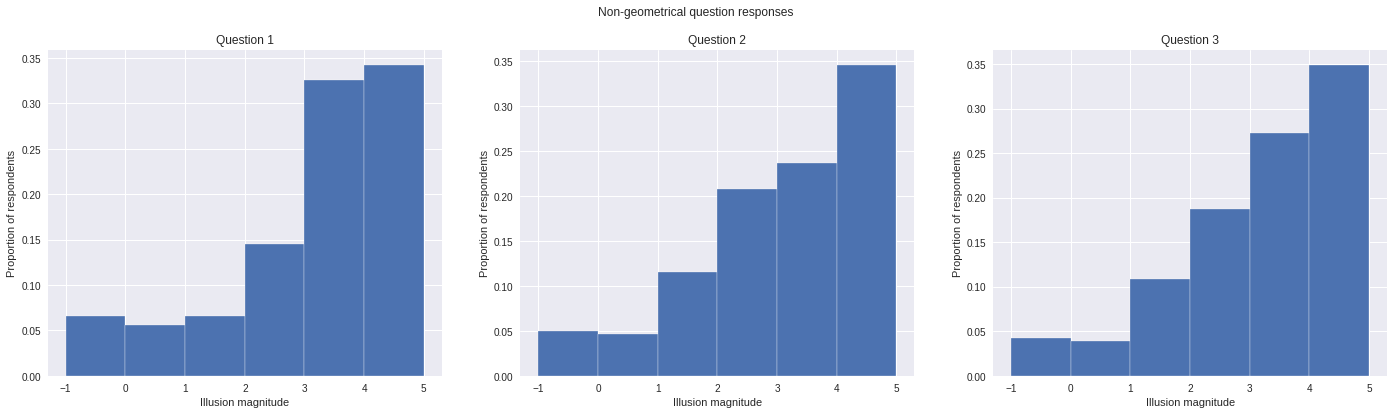

In [11]:
# View some distributions for these geometrical illusion responses

fig, axs = plt.subplots(1, 3, figsize=(24, 6))
fig.patch.set_facecolor('#ffffff')
fig.suptitle('Non-geometrical question responses')

axs[0].hist(ngm_score.iloc[:, 0], bins=range(-1, 6), ec='w', density=True)
axs[0].set_xlabel('Illusion magnitude')
axs[0].set_ylabel('Proportion of respondents')
axs[0].set_title('Question 1');

axs[1].hist(ngm_score.iloc[:, 1], bins=range(-1, 6), ec='w', density=True)
axs[1].set_xlabel('Illusion magnitude')
axs[1].set_ylabel('Proportion of respondents')
axs[1].set_title('Question 2');

axs[2].hist(ngm_score.iloc[:, 2], bins=range(-1, 6), ec='w', density=True)
axs[2].set_xlabel('Illusion magnitude')
axs[2].set_ylabel('Proportion of respondents')
axs[2].set_title('Question 3');

correlation = 0.1851458373022687


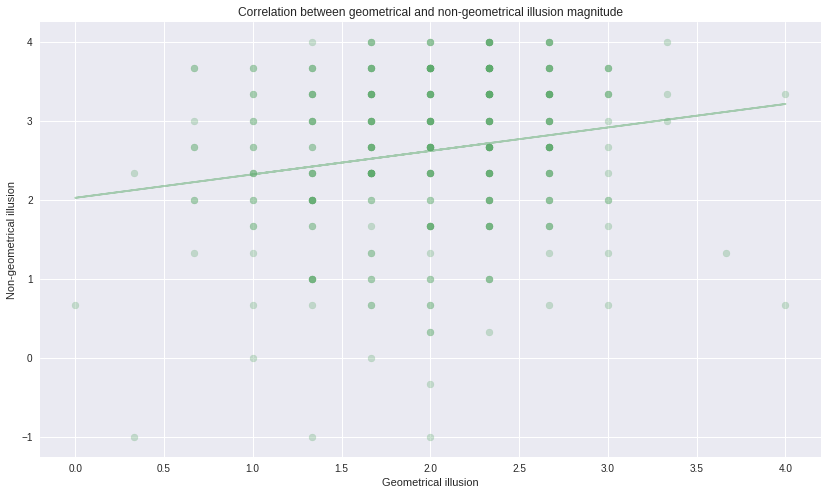

In [12]:
# Distribution of both illusion types
gm_avg = gm_score.mean(axis=1)
ngm_avg = ngm_score.mean(axis=1)

plt.figure(figsize=(14, 8))
plt.scatter(x=gm_avg, y=ngm_avg, alpha=0.3, c='#5fab6e')
print('correlation =', gm_avg.corr(ngm_avg))

m, b = np.polyfit(gm_avg, ngm_avg, 1)
plt.plot(gm_avg, m * gm_avg + b, alpha=0.5, c='#5fab6e');

plt.title('Correlation between geometrical and non-geometrical illusion magnitude')
plt.xlabel('Geometrical illusion')
plt.ylabel('Non-geometrical illusion')
plt.savefig('corr.png', dpi=300)

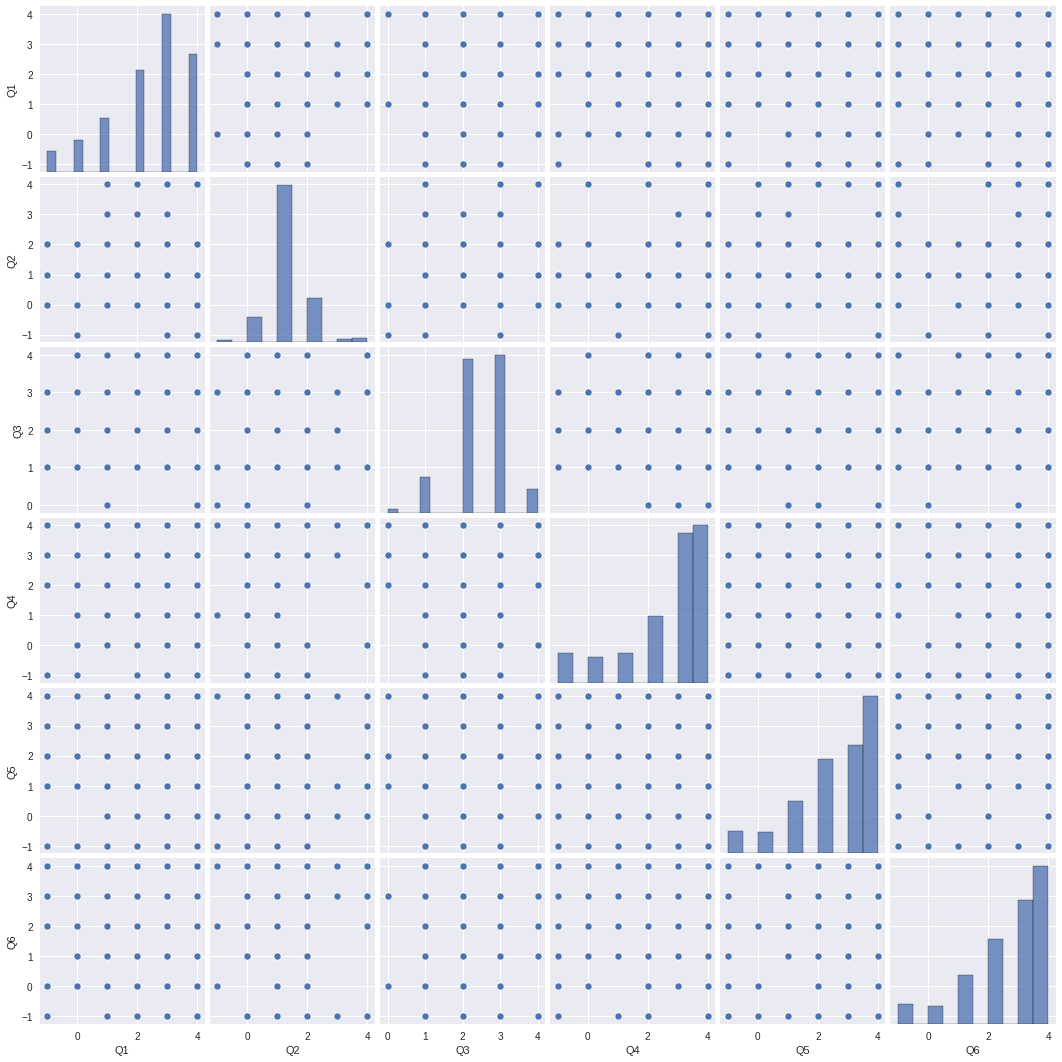

In [13]:
combined = gm_score.merge(ngm_score, left_index=True, right_index=True)
combined.rename(columns={
    combined.columns[0]: 'Q1',
    combined.columns[1]: 'Q2',
    combined.columns[2]: 'Q3',
    combined.columns[3]: 'Q4',
    combined.columns[4]: 'Q5',
    combined.columns[5]: 'Q6'
}, inplace=True)
sns.pairplot(combined)

In [14]:
SELF_EVAL_WEIGHT = 0.1
def dominance(row):
  if row['Self evaluation'] == 'A':
    return SELF_EVAL_WEIGHT + (1 - SELF_EVAL_WEIGHT) * np.mean(row[:-1])
  elif row['Self evaluation'] == 'B':
    return np.mean(row[:-1])
  else:
    return (1 - SELF_EVAL_WEIGHT) * np.mean(row[:-1])

In [15]:
# Isolate brain dominance responses (True = right brain)
dom_raw = data.iloc[:, 3:7].dropna().applymap(lambda s: int(s.split('.')[0] == 'A'))
dom_raw['Self evaluation'] = data.iloc[:, 7].str.split('.', expand=True).iloc[:, 0]
dom_raw['Right'] = dom_raw.apply(dominance, axis=1)
combined['Average magnitude'] = combined.iloc[:, :6].mean(axis=1)
dom = combined.merge(dom_raw[['Right']], left_index=True, right_index=True)
dom['Average geo'] = gm_avg
dom['Average non-geo'] = ngm_avg
dom

,Q1,Q2,Q3,Q4,Q5,Q6,Average magnitude,Right,Average geo,Average non-geo
0,-1,1,3,4,1,2,1.666667,0.675,1.000000,2.333333
1,3,1,2,3,3,4,2.666667,1.000,2.000000,3.333333
2,2,1,1,4,4,2,2.333333,0.750,1.333333,3.333333
3,4,1,2,3,4,3,2.833333,0.500,2.333333,3.333333
4,0,2,3,-1,-1,4,1.166667,0.500,1.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...
310,3,4,4,4,1,-1,2.500000,0.500,3.666667,1.333333
311,3,1,2,4,3,2,2.500000,1.000,2.000000,3.000000
312,1,4,3,4,3,3,3.000000,0.500,2.666667,3.333333
313,3,4,1,2,1,4,2.500000,0.750,2.666667,2.333333


correlation = 0.1347, p = 0.01879


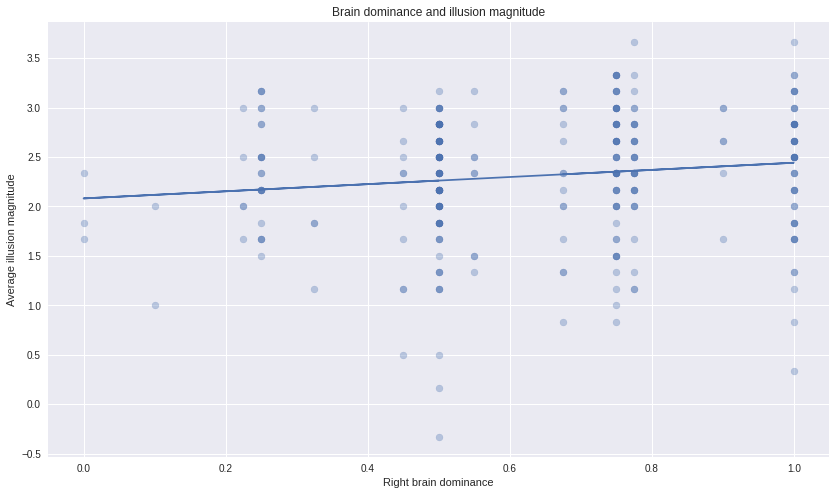

In [16]:
# Correlation
plt.figure(figsize=(14,8))
plt.title('Brain dominance and illusion magnitude')
x = dom['Right']
plt.xlabel('Right brain dominance')
y = dom['Average magnitude']
plt.ylabel('Average illusion magnitude')
print('correlation = {:.4f}, p = {:.5f}'.format(*pearsonr(x, y)))
plt.scatter(x, y, alpha=1/3)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b);
plt.savefig('dom-illusion.png', dpi=300)

correlation = 0.1779, p = 0.00185


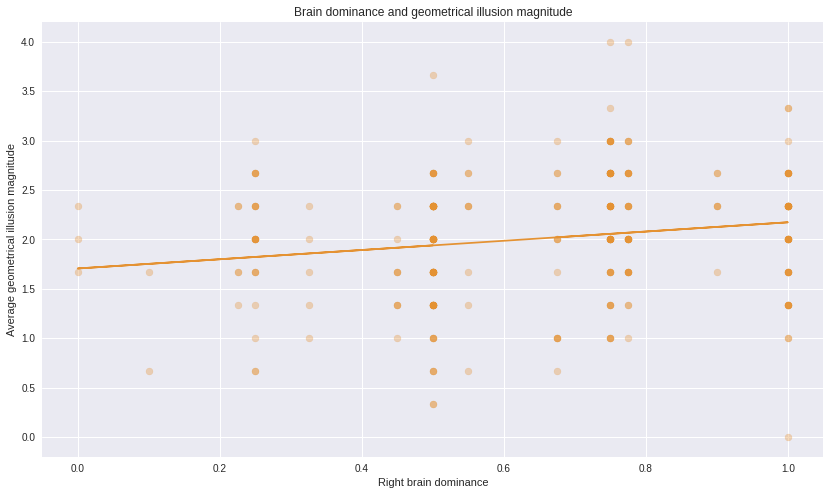

In [17]:
# Correlation for geometrical
dom['Average geo'] = gm_avg

plt.figure(figsize=(14,8))
plt.title('Brain dominance and geometrical illusion magnitude')
x = dom['Right']
plt.xlabel('Right brain dominance')
y = dom['Average geo']
plt.ylabel('Average geometrical illusion magnitude')
print('correlation = {:.4f}, p = {:.5f}'.format(*pearsonr(x, y)))
plt.scatter(x, y, alpha=1/3, c='#E49233')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, c='#E49233');
plt.savefig('dom-geo-illusion.png', dpi=300)

correlation = 0.06046, p = 0.29335


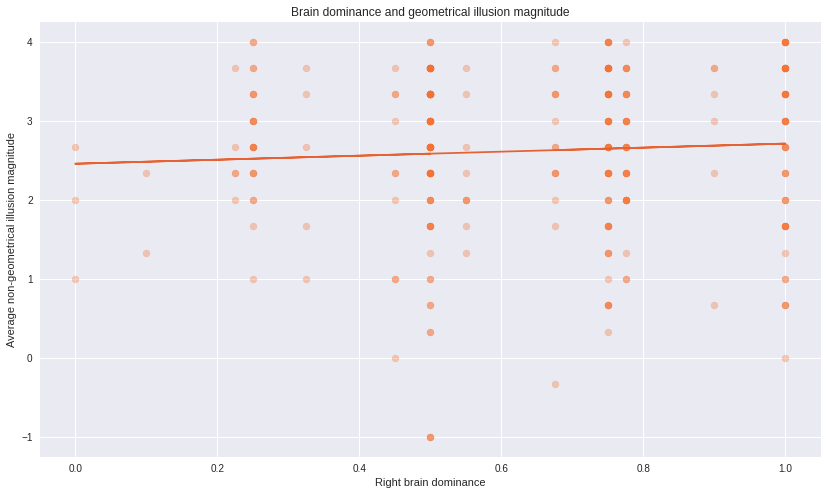

In [18]:
# Correlation for geometrical
dom['Average non-geo'] = ngm_avg

plt.figure(figsize=(14,8))
plt.title('Brain dominance and geometrical illusion magnitude')
x = dom['Right']
plt.xlabel('Right brain dominance')
y = dom['Average non-geo']
plt.ylabel('Average non-geometrical illusion magnitude')
print('correlation = {:.5f}, p = {:.5f}'.format(*pearsonr(x, y)))
plt.scatter(x, y, alpha=1/3, c='#F67233')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, c='#E46233');
plt.savefig('dom-non-geo-illusion.png', dpi=300)

0.04697149405007184

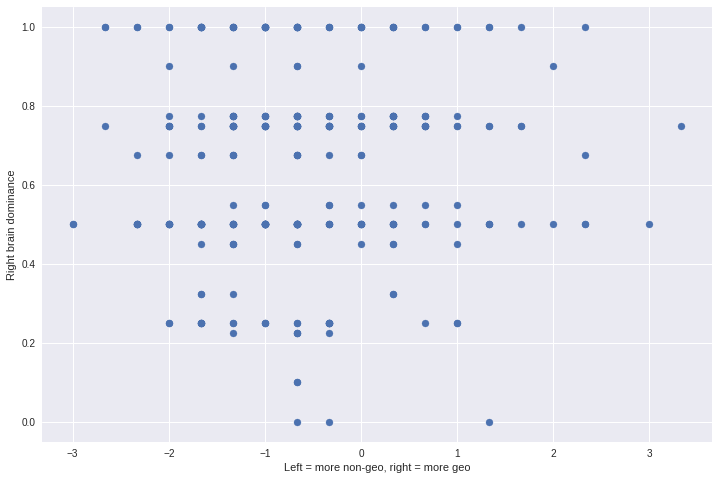

In [19]:
dom['Diff'] = dom['Average geo'] - dom['Average non-geo']
plt.figure(figsize=(12,8))
plt.scatter(dom['Diff'], x)
plt.xlabel('Left = more non-geo, right = more geo')
plt.ylabel('Right brain dominance')
x.corr(dom['Diff'])

In [20]:
age_and_gender = dom.merge(raw.iloc[:, [8, 10]], left_index=True, right_index=True).iloc[:, 6:].dropna()
age_and_gender.rename({
    '1.Please select your gender 请选择您的性别': 'gender',
    '3.Please select your age interval 请选择您的年龄区间': 'age'
}, axis=1, inplace=True)

def age(s):
  s = s.split('.')[1]
  low = int(s.split(' - ')[0])
  high = int(s.split(' - ')[1])
  return (high + low) / 2

age_and_gender['avg'] = age_and_gender['age'].apply(age)
age_and_gender['gender'] = age_and_gender['gender'].apply(lambda s: s.split('.')[0]).map({'A': 'Male', 'B': 'Female', 'C': 'Other'})
age_and_gender

,Average magnitude,Right,Average geo,Average non-geo,Diff,gender,age,avg
0,1.666667,0.675,1.000000,2.333333,-1.333333,Female,F.43 - 48,45.5
1,2.666667,1.000,2.000000,3.333333,-1.333333,Male,G.48 - 53,50.5
2,2.333333,0.750,1.333333,3.333333,-2.000000,Female,A.18 - 23,20.5
3,2.833333,0.500,2.333333,3.333333,-1.000000,Male,A.18 - 23,20.5
4,1.166667,0.500,1.666667,0.666667,1.000000,Male,A.18 - 23,20.5
...,...,...,...,...,...,...,...,...
309,2.333333,0.900,2.333333,2.333333,0.000000,Female,B.23 - 28,25.5
310,2.500000,0.500,3.666667,1.333333,2.333333,Female,C.28 - 33,30.5
311,2.500000,1.000,2.000000,3.000000,-1.000000,Female,D.33 - 38,35.5
312,3.000000,0.500,2.666667,3.333333,-0.666667,Male,A.18 - 23,20.5


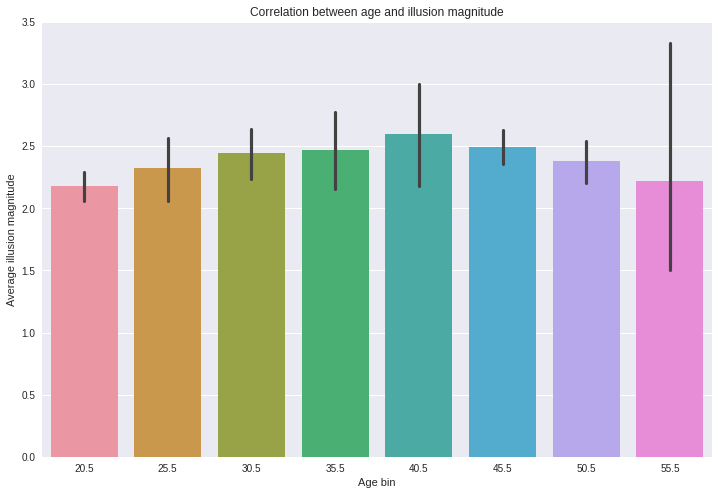

In [21]:
# Age and illusion magnitude
plt.figure(figsize=(12, 8))
plt.title('Correlation between age and illusion magnitude')
sns.barplot(x=age_and_gender['avg'], y=age_and_gender['Average magnitude'])
plt.xlabel('Age bin')
plt.ylabel('Average illusion magnitude')
plt.savefig('age_dist.png', dpi=300)

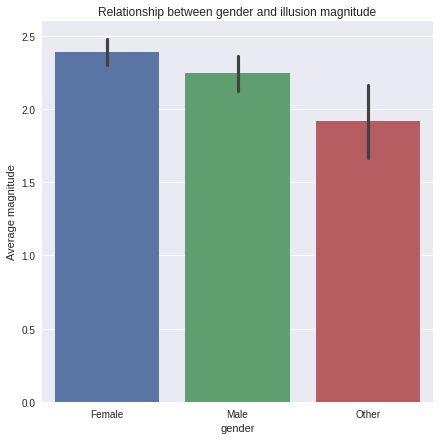

In [22]:
# Plot the relationship between gender and illusion magnitude
plt.figure(figsize=(7, 7))
plt.title('Relationship between gender and illusion magnitude')
sns.barplot(x=age_and_gender['gender'], y=age_and_gender['Average magnitude']);
plt.savefig('gender-corr.png', dpi=250)

In [23]:
# Extract age distribution for writing the report
age_and_gender['avg'].std(), age_and_gender['avg'].mean()

(12.605681340613716, 32.98251748251748)